In [78]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
#independent variable scale should be the same
#types of feature scaling.
#1:standardization
#2:Normalization
#but today i will discuss about standardization(its is also called z score normalization)
#standraize formukla is =[ xi - x(mean)/standard diviation]

In [36]:
#Take a example of real_world and why i need that
#what if we have outlier in the data and how to set the outlier 
#when we need to set the outlier.

In [47]:
#Lets discuss about the example.
var=pd.read_csv("Social_Network_Ads.csv")
var.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
115,15689237,Male,40,57000,0
120,15811613,Female,36,75000,0
96,15710257,Female,35,25000,0
123,15574305,Male,35,53000,0


In [50]:
var.sample(4)

,Age,EstimatedSalary,Purchased
143,30,89000,0
258,58,95000,1
223,60,102000,1
292,55,39000,1


In [56]:
x=var[["Age","EstimatedSalary"]]
y=var[["Purchased"]]
y.sample(2)
x.sample(2)

,Age,EstimatedSalary
338,38,55000
130,31,58000


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [71]:
scalar=StandardScaler() #standard scalar class with object scalar
scalar.fit(x_train)  #fit mean to calculate mean of both columns
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [72]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [73]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [81]:
np.round(var.describe(),1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


In [140]:
y_test.shape

(120, 1)

In [82]:
np.round(x_train_scaled.describe(),1) #now its prove that after standard scale our mean is 0 and Sd is 1.

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [83]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

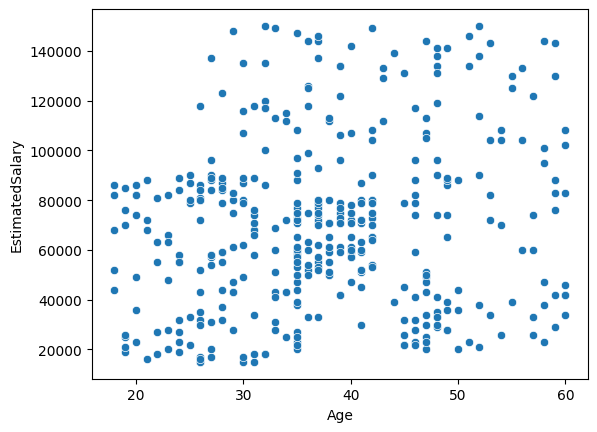

In [88]:
#effect of scaling
sns.scatterplot(data=var,x="Age",y="EstimatedSalary")


In [90]:
x_train_scaled.sample(4)

,Age,EstimatedSalary
186,-0.869053,0.381525
98,-1.555332,-0.428208
122,1.189783,-0.746318
225,-0.280814,-1.353618


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

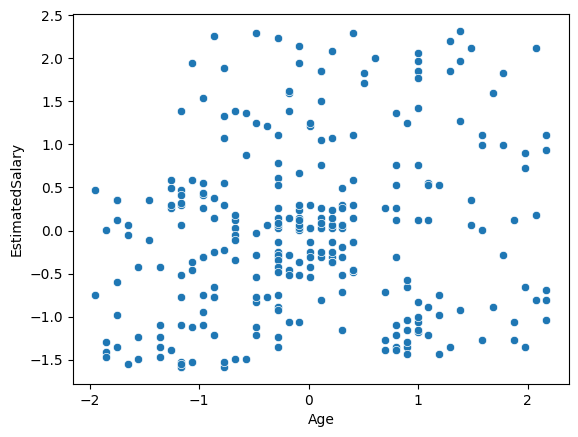

In [97]:
#After scaling
sns.scatterplot(data=x_train_scaled,x="Age",y="EstimatedSalary")

<Axes: xlabel='Age', ylabel='Density'>

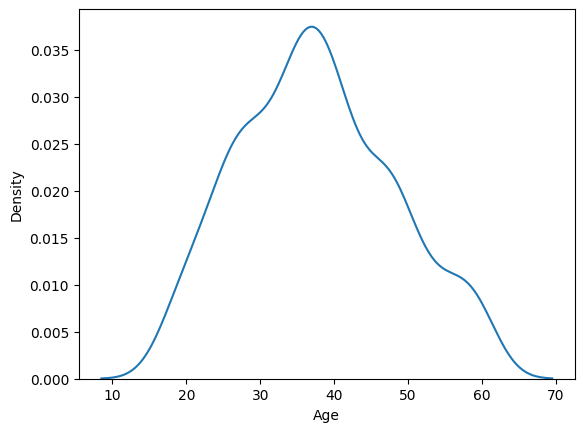

In [99]:
#Before scaling
sns.kdeplot(data=var["Age"])

<Axes: xlabel='Age', ylabel='Density'>

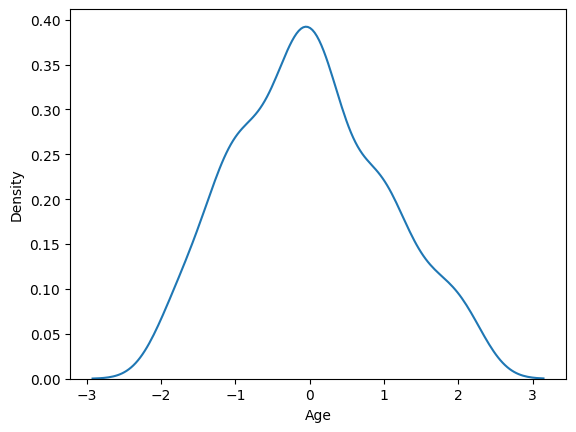

In [104]:
#After scaling
sns.kdeplot(data=x_train_scaled["Age"],legend=True) #now the mean is the xero

In [125]:
from sklearn.linear_model import LogisticRegression

,Purchased
374,0
176,0
191,0


In [126]:
x_train.sample(3)
x_train_scaled.sample(3)

,Age,EstimatedSalary
159,-1.359252,-0.428208
187,1.581942,-1.266861
82,2.072142,2.116668


In [127]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [131]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)


In [132]:
from sklearn.metrics import accuracy_score

In [133]:
ascore=accuracy_score(y_pred,y_test)
ascore_scaled=accuracy_score(y_pred_scaled,y_test)
print("Without scale accuracy is:",ascore)
print("With scale accuracy is:",ascore_scaled)

Without scale accuracy is: 0.875
With scale accuracy is: 0.8666666666666667


In [134]:
var.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

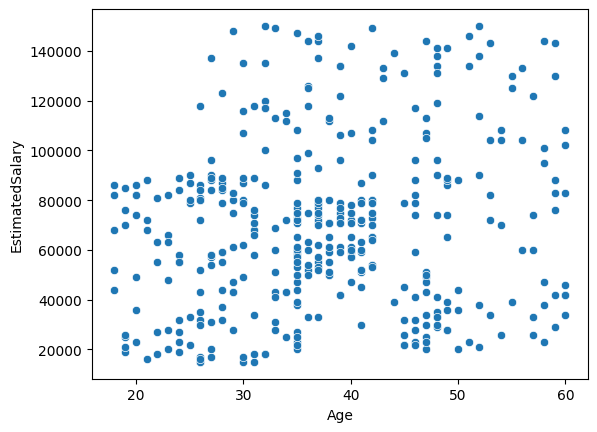

In [136]:
sns.scatterplot(data=var,x="Age",y="EstimatedSalary")

In [ ]:
#When to use standardization
#These are some algoritham when you work on that you can use standardization
#1:K-Mean
#2:K-Nearest-Neighbour 
#in both 2 above algoritham we used to calculate the distance between the points for that we need to do standardization
#3:Gradiend Descent 
#Neural_Network

#Where we never need to use Standardization
#1:Discion Tree

